In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('Company_Data.csv')

In [97]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Exploratory Data Analysis

In [98]:
label_encoder = preprocessing.LabelEncoder()
df['US']= label_encoder.fit_transform(df['US']) 

In [99]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,1


In [100]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban']) 

In [101]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [102]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])

In [103]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [104]:
df.shape

(400, 11)

In [105]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [106]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


# Visualization

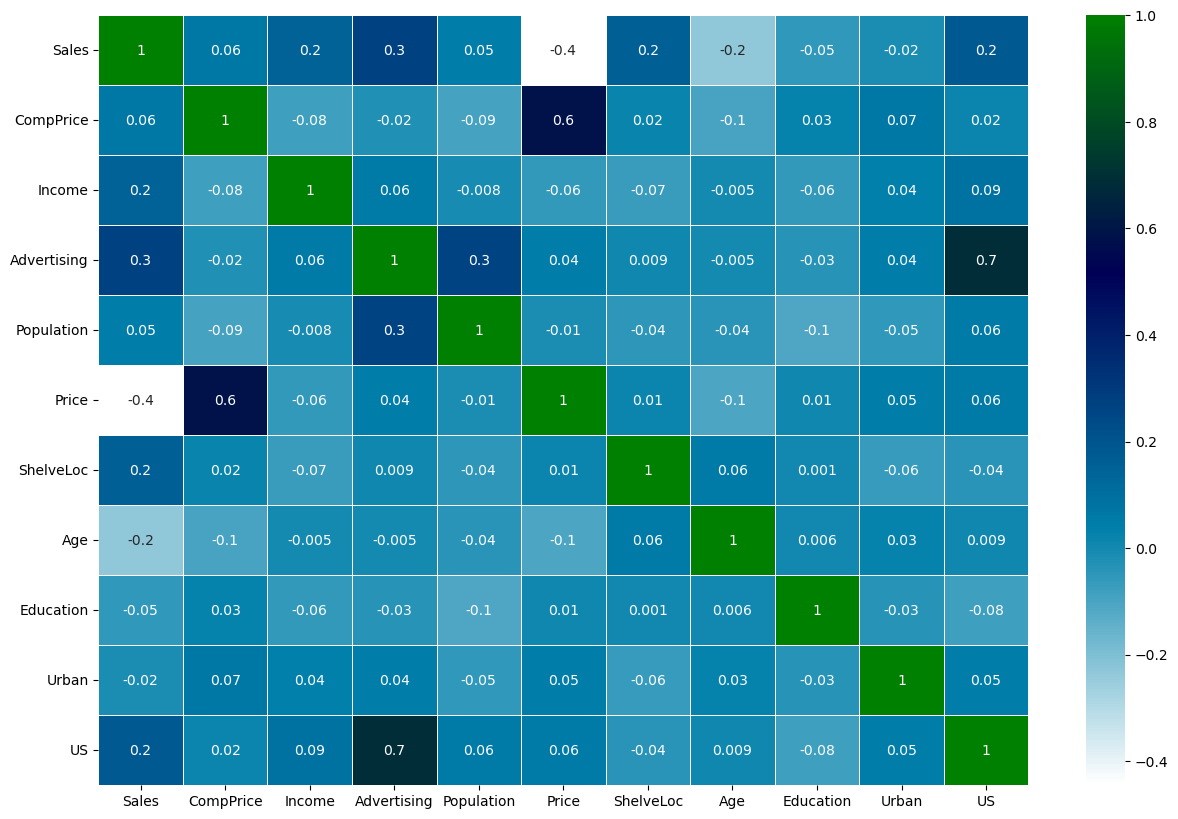

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="ocean_r",linewidth=0.5);

<AxesSubplot:>

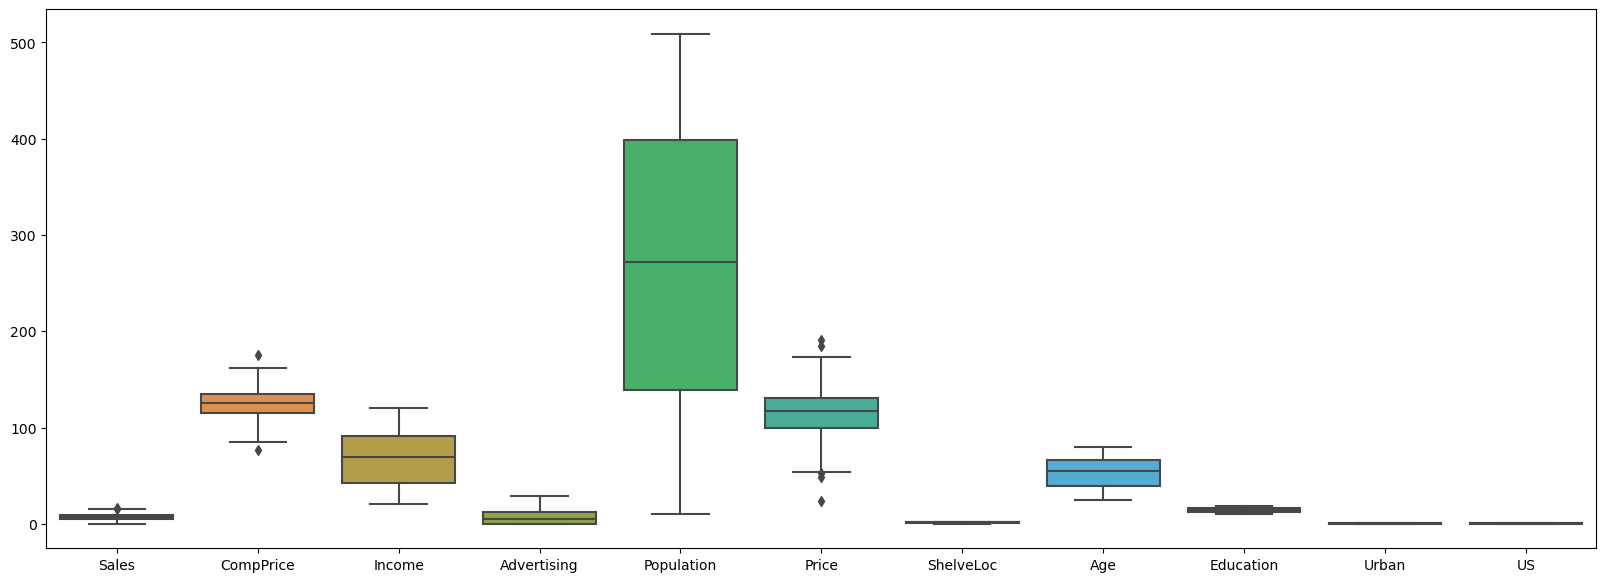

In [108]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

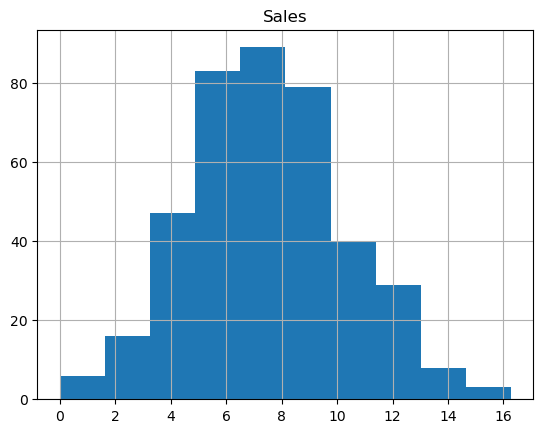

In [109]:
df.hist('Sales')

In [110]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [111]:
df['Sales'] = pd.cut(df['Sales'], bins=[0,5.42,10.84,17], labels=[0,1,2])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [112]:
df.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [113]:
df=df.dropna()

In [114]:
df.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int32
Age               int64
Education         int64
Urban             int32
US                int32
dtype: object

In [115]:
df['Sales']=df['Sales'].astype(int)

In [116]:
df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

# Training and Testing

In [117]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [118]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [119]:
y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    1
Name: Sales, Length: 399, dtype: int32

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [168]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_depth":[4,6,8,10,12,14],"min_samples_split":[2,4,6,8]}

In [170]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

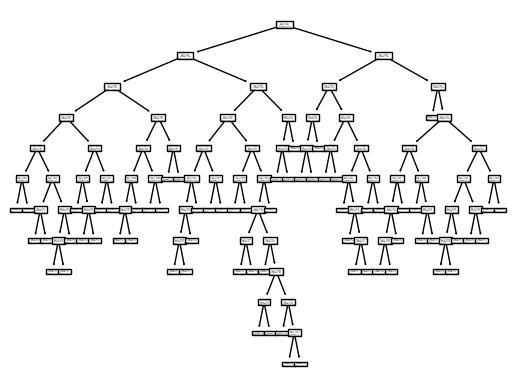

In [171]:
tree.plot_tree(model)
plt.show()

In [122]:
gd=GridSearchCV(model,parameters,cv=10)

In [123]:
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8]})

In [124]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}

In [125]:
gd.best_score_

0.7362903225806452

# Second Model

In [126]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=6,random_state=14)

In [127]:
second_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       random_state=14)

In [128]:
y_test_pred=second_model.predict(x_test)
y_test_pred

array([1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1])

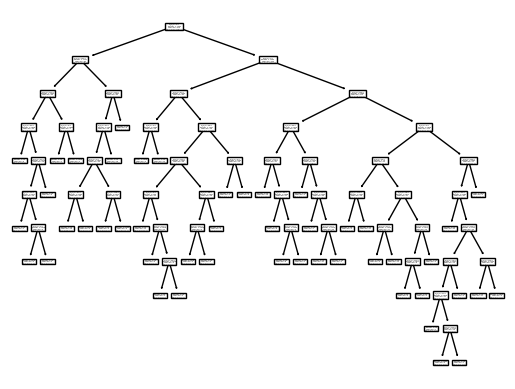

In [129]:
tree.plot_tree(second_model)
plt.show()

In [130]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.74      0.65      0.70        49
           2       0.53      0.67      0.59        12

    accuracy                           0.65        80
   macro avg       0.61      0.65      0.62        80
weighted avg       0.67      0.65      0.65        80



In [131]:
score=cross_val_score(second_model,x_train,y_train,cv=10)
score.mean()

<IPython.core.display.Javascript object>

0.7019153225806452

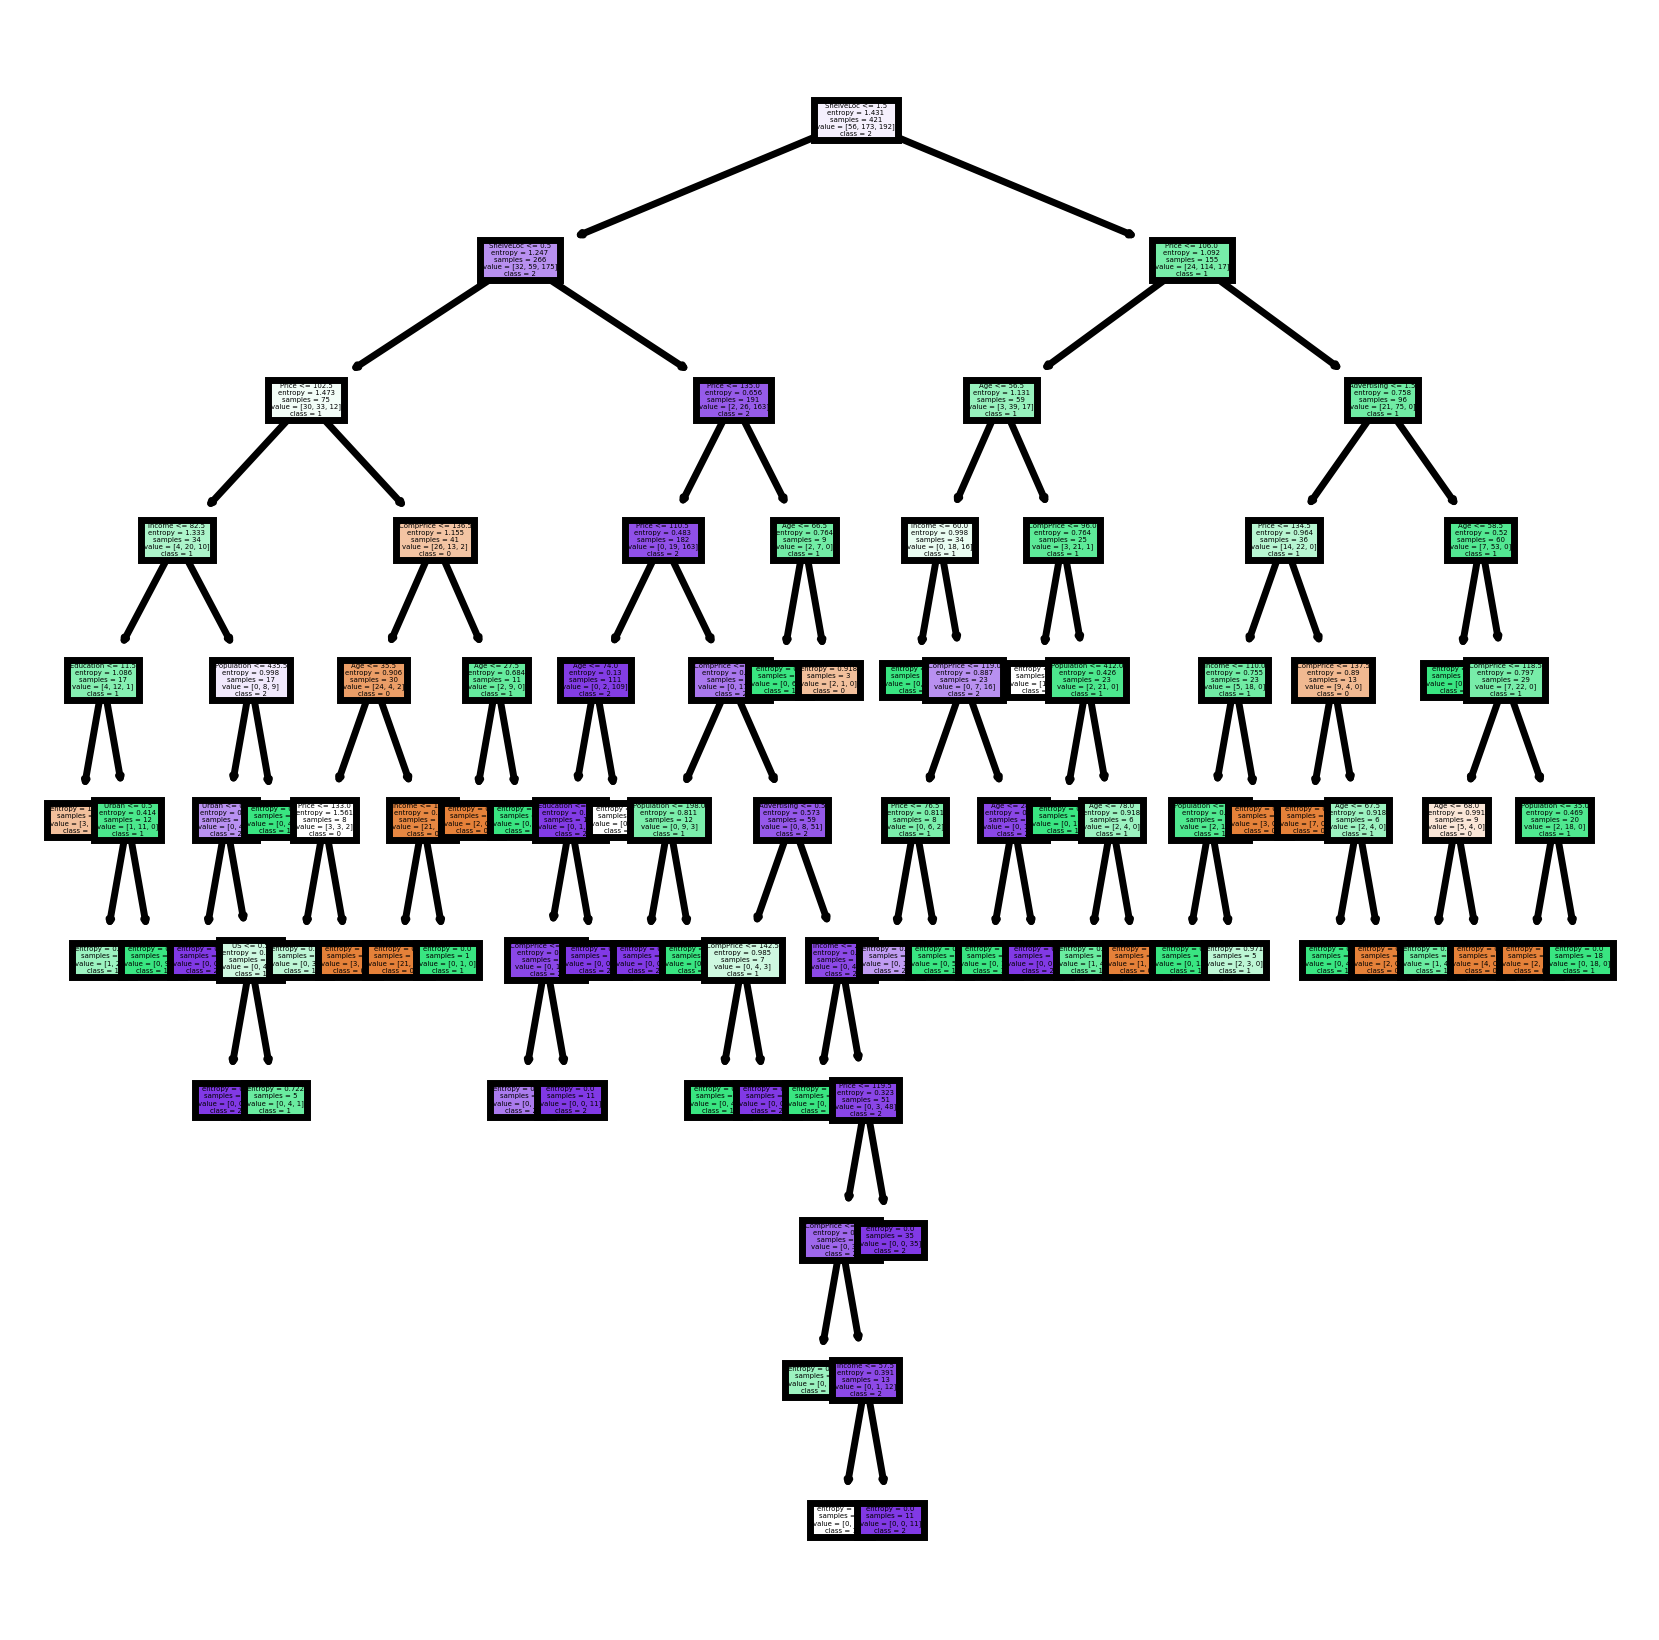

In [132]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']  # Features names
cn=['0','1','2']  # Class Names
fig,axes=plt.subplots(figsize = (4,4), dpi=500)
tree.plot_tree(final_model, feature_names = fn, class_names=cn, filled = True)
plt.show()

# SMOTE Techniques

In [133]:
from imblearn.combine import SMOTETomek

In [134]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [135]:
sm = SMOTETomek(sampling_strategy='minority',random_state=42)
X_re,y_re = sm.fit_resample(df.drop(['Sales'],axis=1),df['Sales'])

In [136]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [137]:
df1 = pd.concat([pd.DataFrame(y_re),pd.DataFrame(X_re)],axis =1)

In [138]:
df1['Sales'].value_counts()

2    242
1    214
0     71
Name: Sales, dtype: int64

Text(0, 0.5, 'frequency')

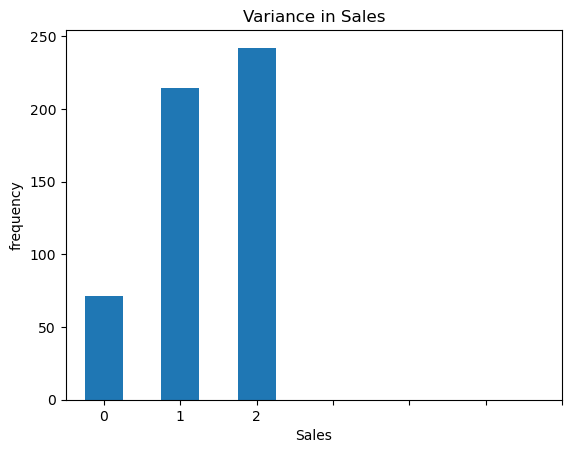

In [139]:
type_class = pd.value_counts(df1['Sales'],sort = True,ascending=True)
type_class.plot(kind ='bar',rot =0)
plt.title('Variance in Sales')
plt.xticks(range(7))
plt.xlabel('Sales')
plt.ylabel('frequency')

In [140]:
array = df1.values
x=array[:,1:]
y=array[:,0]

In [141]:
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [116,  91,   4, ...,  13,   1,   1],
       [126,  78,  21, ...,  14,   0,   1],
       [141,  51,   5, ...,  11,   0,   0]], dtype=int64)

In [142]:
y

array([1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [144]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_depth":[4,6,8,10,12,14],"min_samples_split":[2,4,6,8]}

In [145]:
gd=GridSearchCV(model,parameters,cv=10)

In [146]:
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8]})

In [147]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}

In [148]:
gd.best_score_

0.7935769656699889

# Final Model

In [161]:
final_model=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=6,random_state=14)

In [162]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6,
                       random_state=14)

In [163]:
y_test_pred=final_model.predict(x_test)
y_test_pred

array([1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [164]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.68      0.73      0.71        41
           2       0.85      0.90      0.87        50

    accuracy                           0.75       106
   macro avg       0.66      0.63      0.64       106
weighted avg       0.73      0.75      0.73       106



In [165]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

<IPython.core.display.Javascript object>

0.7744186046511627

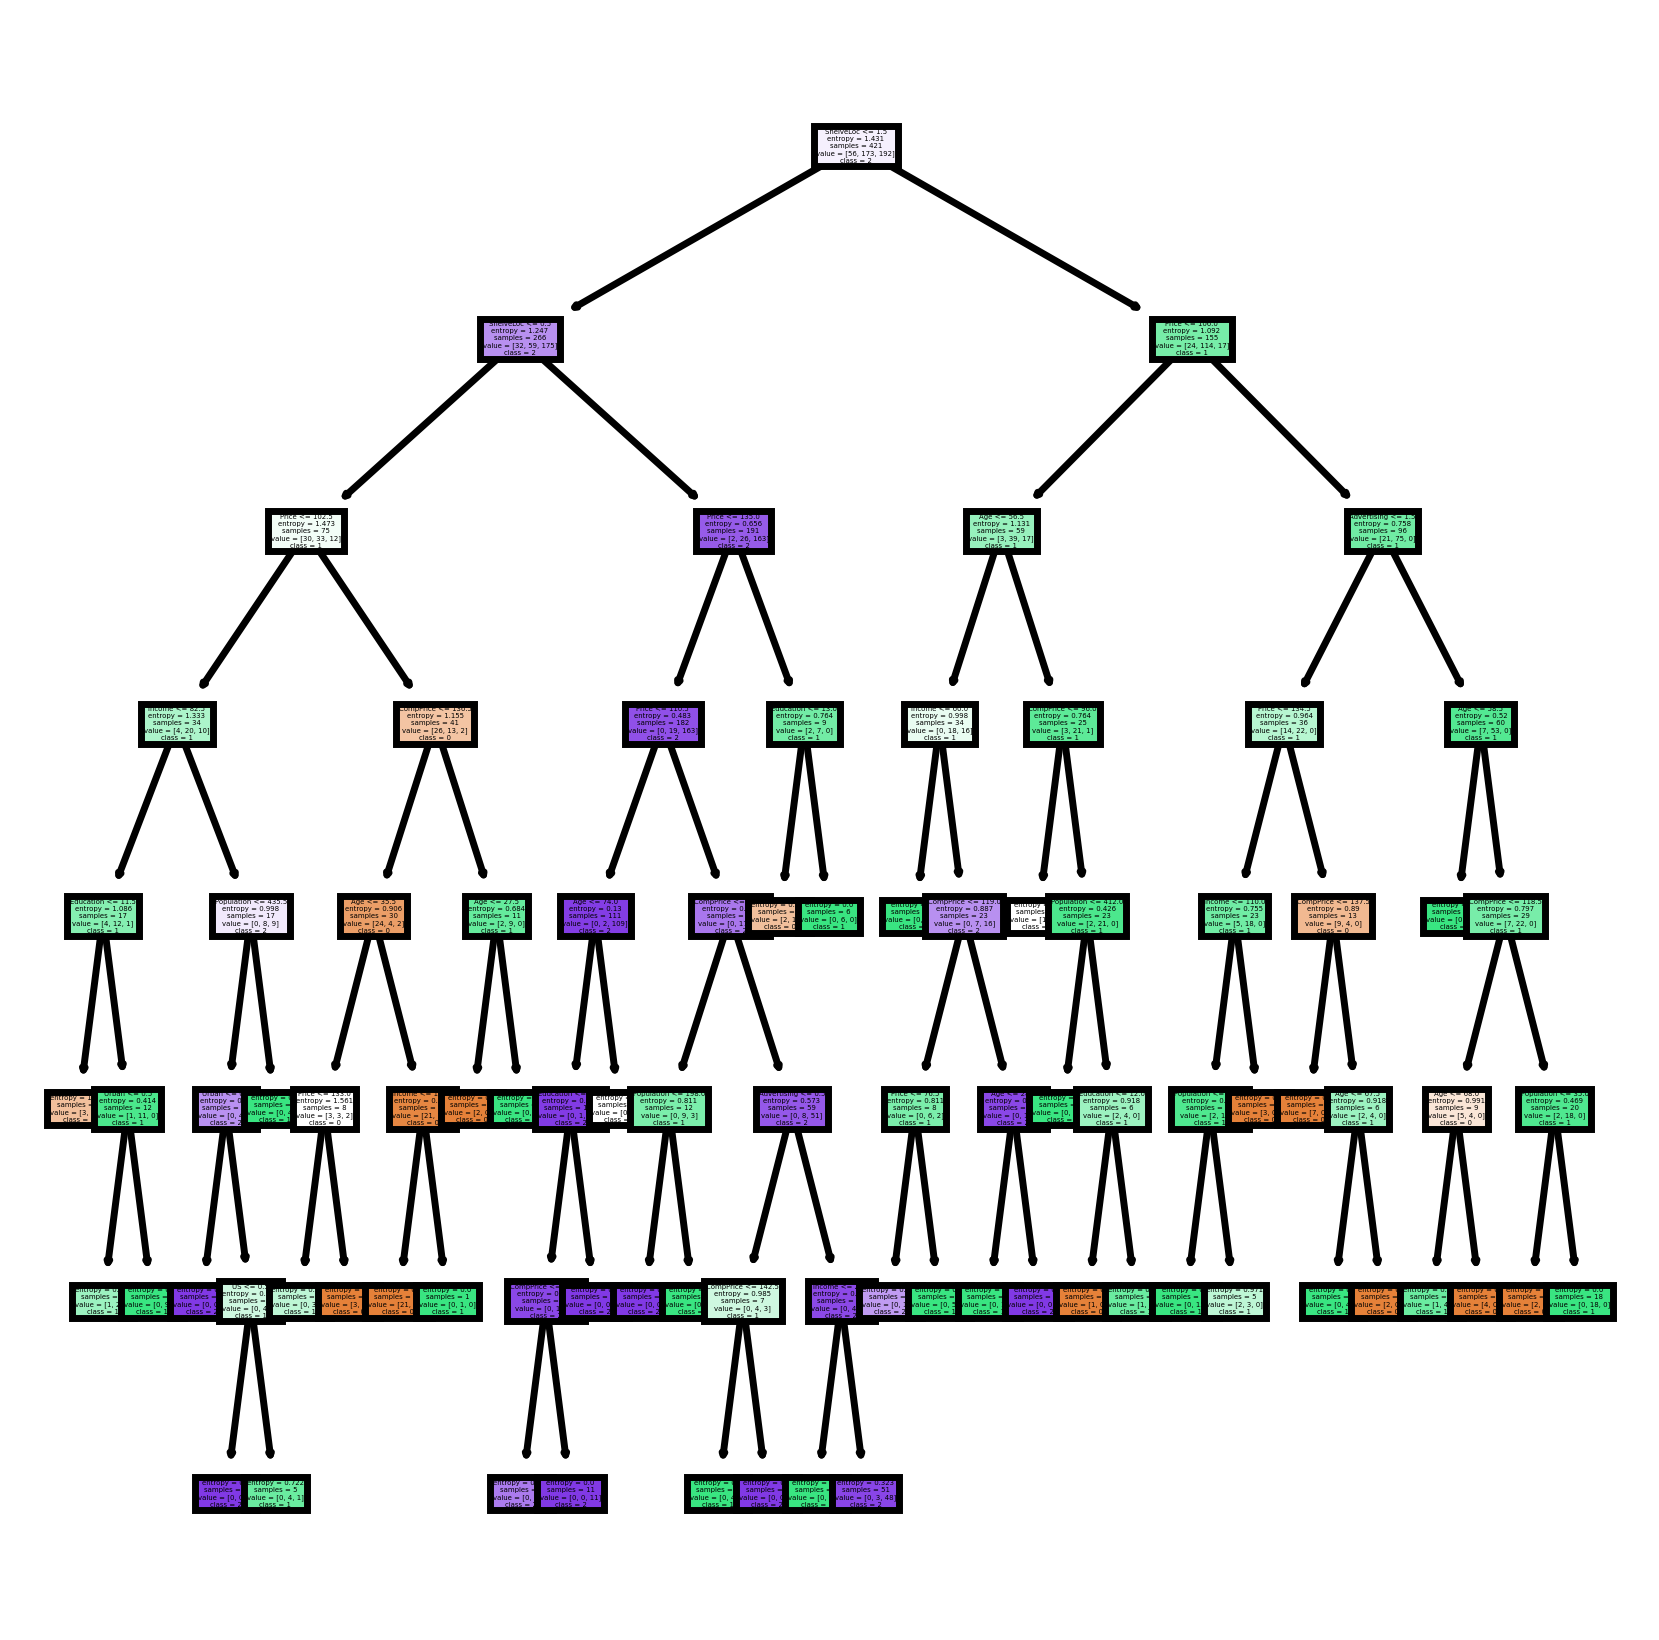

In [166]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']  # Features names
cn=['0','1','2']  # Class Names
fig,axes=plt.subplots(figsize = (4,4), dpi=500)
tree.plot_tree(final_model, feature_names = fn, class_names=cn, filled = True)
plt.show()

In [172]:
# Here SMOTETomek is making change thats why we go with our this model.